In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier,RandomForestRegressor
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, StandardScaler, Normalizer
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
data_path = "../Data/2021-ml100marathon-midterm/"
df_train = pd.read_csv(data_path + 'train_data.csv')
df_test = pd.read_csv(data_path + 'test_features.csv')

In [3]:
df_train.head()

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,1617011.0,174839.0,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,1573324.0,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,602671.0,907502.0,True,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,375304.0,486.0,True,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


In [4]:
df_test.head()

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,BELDEN TIMOTHY N,5249999.0,2144013.0,-2334434.0,NaN,tim.belden@enron.com,953136.0,17355.0,484.0,228.0,...,NaN,NaN,210698.0,157569.0,NaN,213999.0,5521.0,7991.0,5501630.0,1110705.0
1,BOWEN JR RAYMOND M,1350000.0,NaN,-833.0,NaN,raymond.bowen@enron.com,NaN,65907.0,27.0,140.0,...,NaN,974293.0,1621.0,252055.0,NaN,278601.0,1593.0,1858.0,2669589.0,252055.0
2,HANNON KEVIN P,1500000.0,NaN,-3117011.0,NaN,kevin.hannon@enron.com,5538001.0,34039.0,32.0,32.0,...,NaN,1617011.0,11350.0,853064.0,NaN,243293.0,1035.0,1045.0,288682.0,6391065.0
3,DELAINEY DAVID W,3000000.0,NaN,NaN,NaN,david.delainey@enron.com,2291113.0,86174.0,3069.0,66.0,...,NaN,1294981.0,1661.0,1323148.0,NaN,365163.0,2097.0,3093.0,4747979.0,3614261.0
4,CAUSEY RICHARD A,1000000.0,NaN,-235000.0,NaN,richard.causey@enron.com,NaN,30674.0,49.0,58.0,...,NaN,350000.0,307895.0,2502063.0,NaN,415189.0,1585.0,1892.0,1868758.0,2502063.0


In [5]:
#財務特徵
finance_feature= ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 
                  'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 
                  'long_term_incentive', 'restricted_stock', 'director_fees']
#email特徵
email_feature=['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi',
               'shared_receipt_with_poi']

In [6]:
df_train_finance_feature=df_train[finance_feature]
df_train_finance_feature

,salary,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,exercised_stock_options,other,long_term_incentive,restricted_stock,director_fees
0,420636.0,NaN,505050.0,NaN,1750000.0,NaN,-3504386.0,22542539.0,46950.0,19794175.0,174839.0,1617011.0,2748364.0,NaN
1,1111258.0,NaN,8682716.0,NaN,5600000.0,NaN,NaN,26093672.0,29336.0,19250000.0,22122.0,1920000.0,6843672.0,NaN
2,211844.0,NaN,2003885.0,NaN,200000.0,NaN,-4167.0,2493616.0,22884.0,1624396.0,1573324.0,NaN,869220.0,NaN
3,224305.0,NaN,2652612.0,NaN,800000.0,NaN,NaN,985032.0,118134.0,NaN,907502.0,602671.0,985032.0,NaN
4,240189.0,NaN,1639297.0,NaN,1250000.0,NaN,-262500.0,126027.0,35818.0,NaN,486.0,375304.0,126027.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,239502.0,NaN,1112087.0,NaN,500000.0,NaN,NaN,511734.0,16514.0,NaN,356071.0,NaN,511734.0,NaN
109,NaN,NaN,49288.0,NaN,NaN,NaN,NaN,NaN,49288.0,NaN,NaN,NaN,NaN,NaN
110,655037.0,NaN,1386690.0,400000.0,300000.0,NaN,NaN,28798.0,31653.0,28798.0,NaN,NaN,NaN,NaN
111,NaN,NaN,475.0,NaN,NaN,NaN,NaN,2217299.0,475.0,NaN,NaN,NaN,2217299.0,NaN


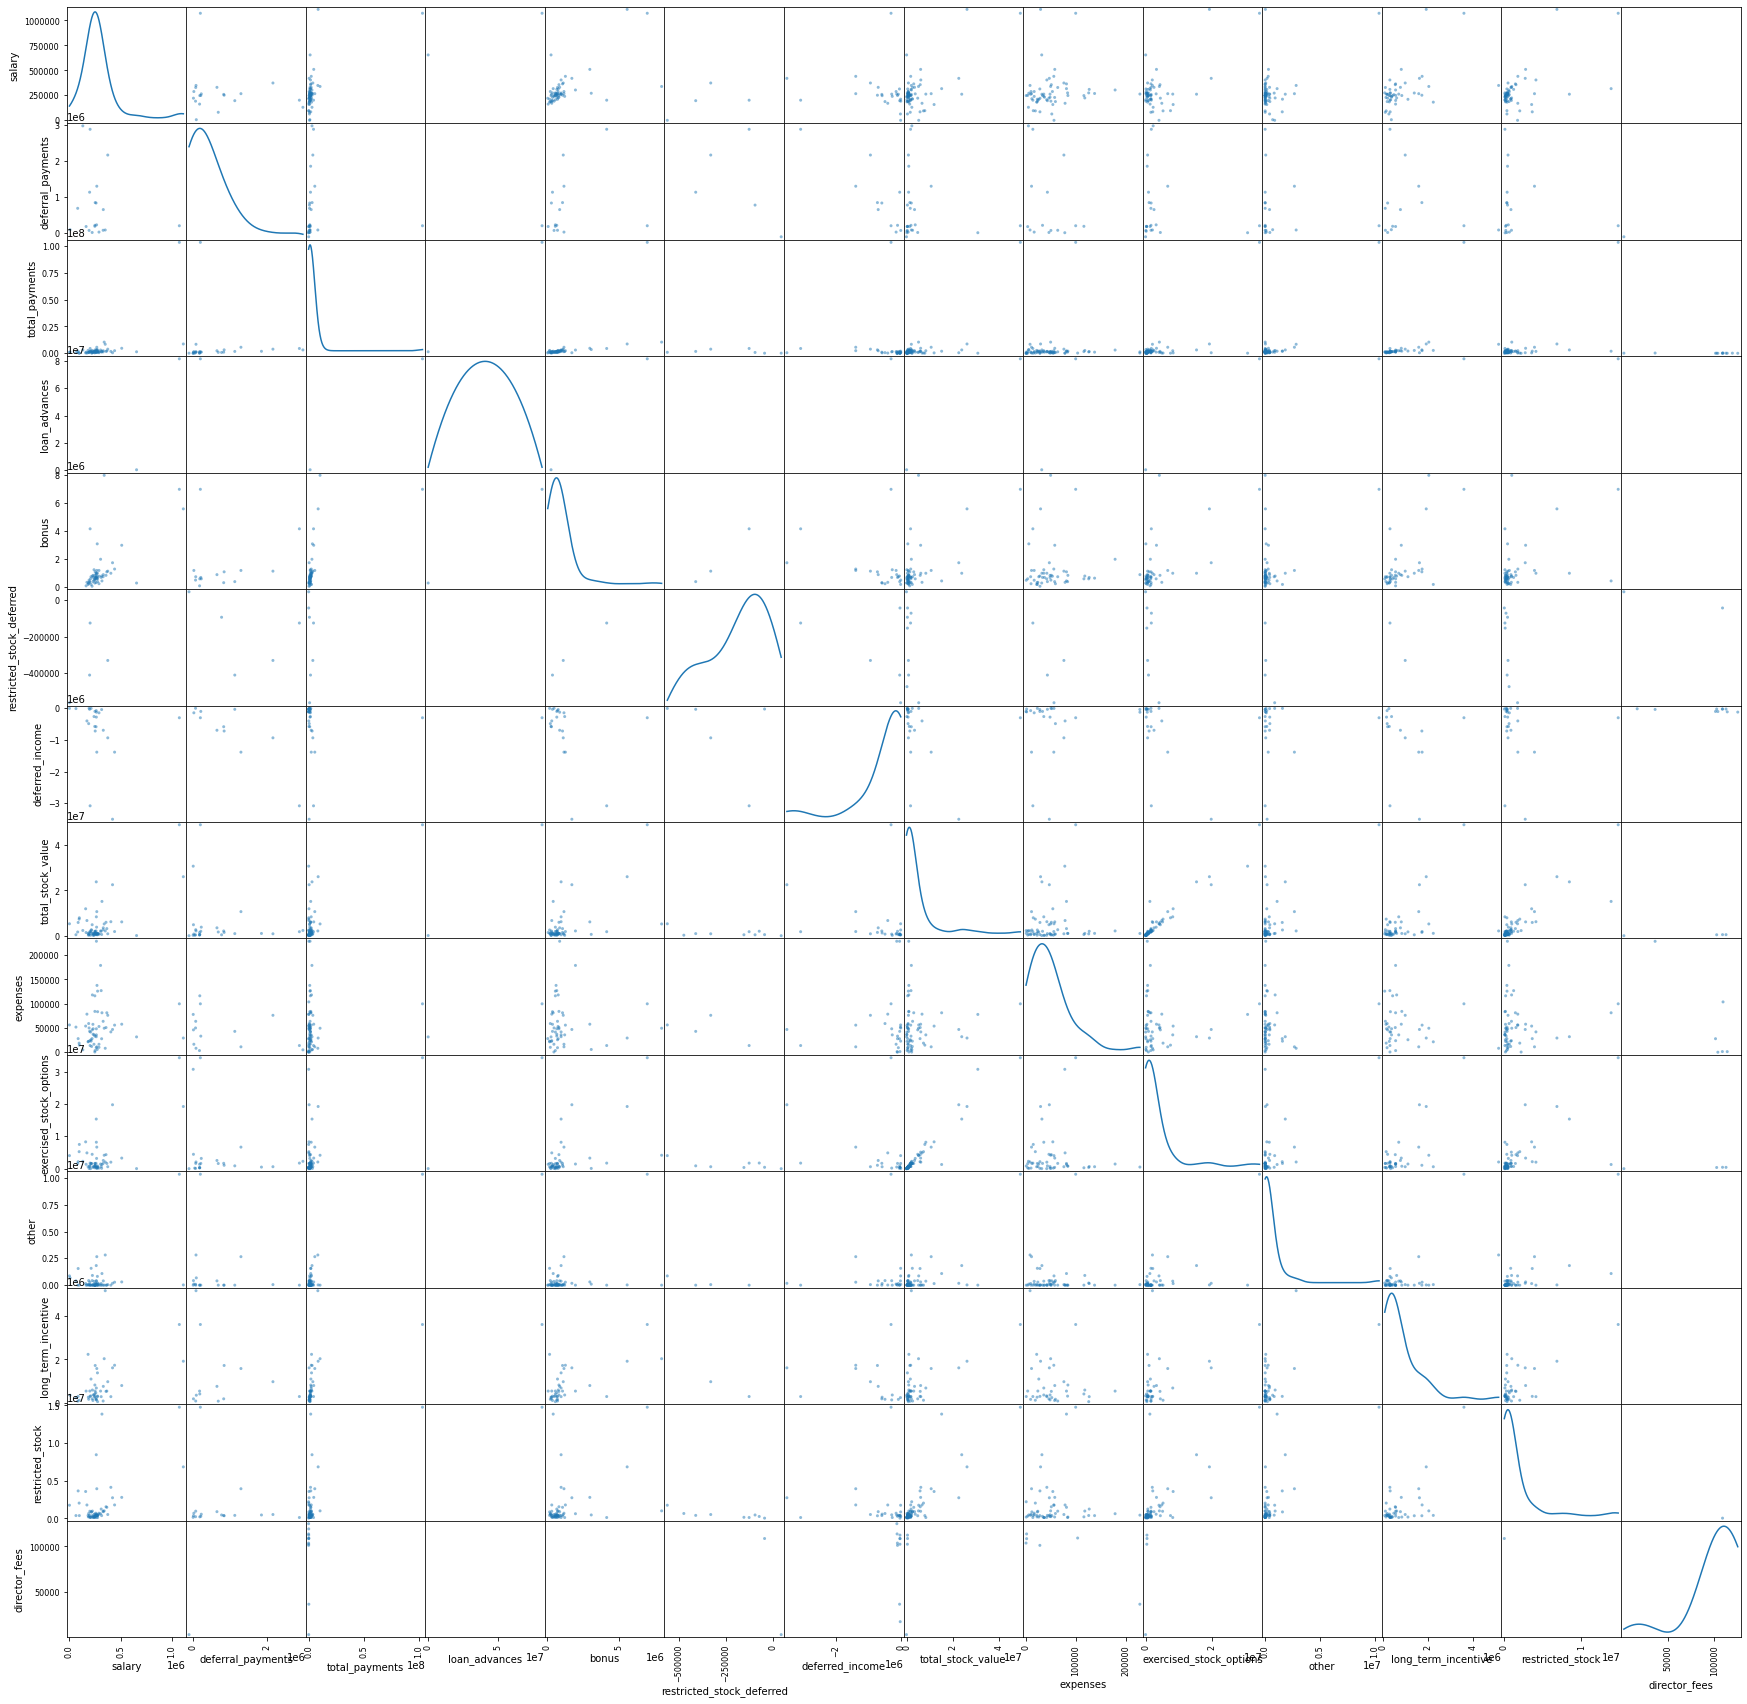

In [7]:
#敘述統計
pd.plotting.scatter_matrix(df_train_finance_feature, figsize = (30, 30), diagonal = 'kde')
plt.show()

In [8]:
#相關性分析
df_train.corr().loc['poi',:].sort_values(ascending=False)

loan_advances                1.000000
poi                          1.000000
exercised_stock_options      0.591972
total_stock_value            0.443098
salary                       0.371917
total_payments               0.271335
restricted_stock             0.261102
bonus                        0.242170
long_term_incentive          0.227805
other                        0.225619
expenses                     0.136386
from_poi_to_this_person      0.127932
shared_receipt_with_poi      0.120467
to_messages                 -0.023047
from_this_person_to_poi     -0.096864
from_messages               -0.126760
deferred_income             -0.224654
deferral_payments           -0.251548
director_fees                     NaN
restricted_stock_deferred         NaN
Name: poi, dtype: float64

In [9]:
# 查看資料型態，及缺失值分布狀況
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       113 non-null    object 
 1   bonus                      61 non-null     float64
 2   deferral_payments          28 non-null     float64
 3   deferred_income            34 non-null     float64
 4   director_fees              13 non-null     float64
 5   email_address              83 non-null     object 
 6   exercised_stock_options    81 non-null     float64
 7   expenses                   73 non-null     float64
 8   from_messages              65 non-null     float64
 9   from_poi_to_this_person    65 non-null     float64
 10  from_this_person_to_poi    65 non-null     float64
 11  loan_advances              2 non-null      float64
 12  long_term_incentive        49 non-null     float64
 13  other                      69 non-null     float64

In [10]:
num_feature = []
for feature in df_train:
    if df_train[feature].dtype == 'float64' :
        num_feature.append(feature)
num_feature

['bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value']

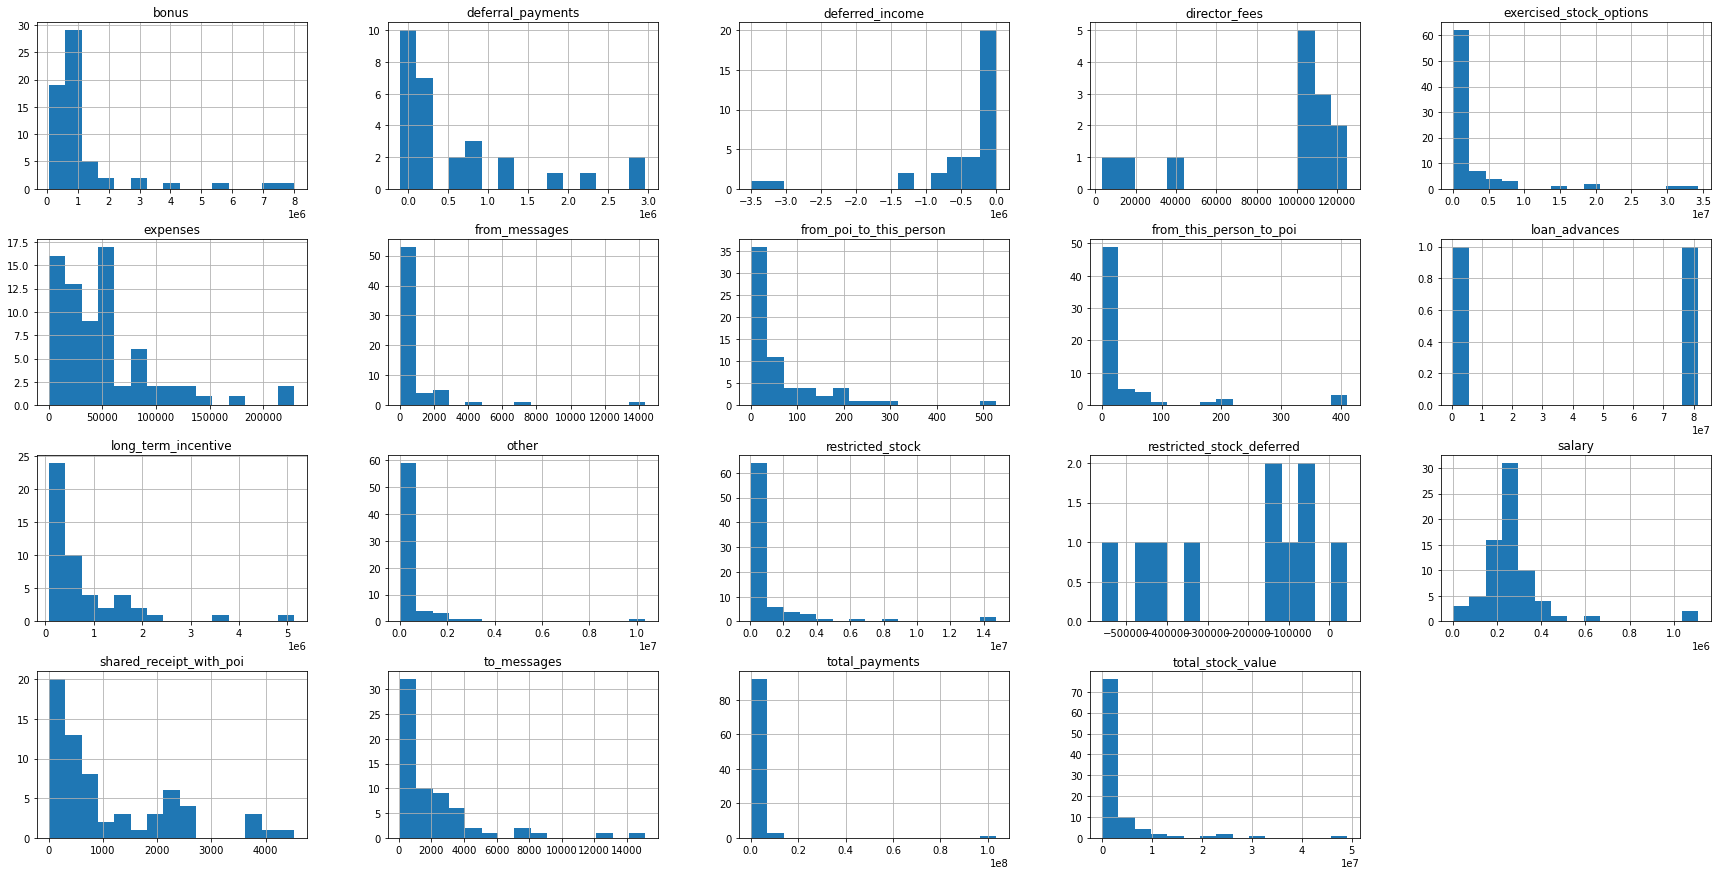

In [11]:
# 各資料欄位視覺化
df_train[num_feature].hist(bins = 15, figsize=(30,15), layout=(4,5))
plt.show()

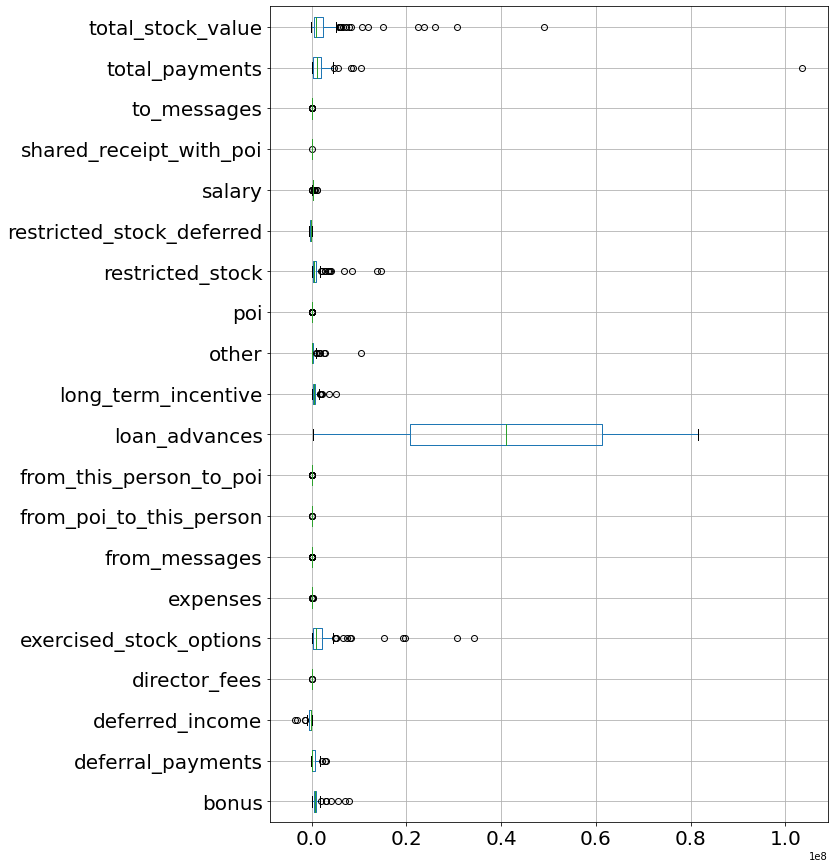

In [12]:
df_train.boxplot(vert=False, figsize=(10,15),fontsize=20)
plt.show()

## 資料前處理

In [13]:
train_Y = df_train['poi']
name = df_test['name']
df_train = df_train.drop(['name', 'poi','email_address'] , axis=1)
df_test = df_test.drop(['name', 'email_address'] , axis=1)
df = pd.concat([df_train,df_test])
df.head()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1750000.0,NaN,-3504386.0,NaN,19794175.0,46950.0,18.0,42.0,4.0,NaN,1617011.0,174839.0,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,5600000.0,NaN,NaN,NaN,19250000.0,29336.0,108.0,88.0,30.0,NaN,1920000.0,22122.0,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,200000.0,NaN,-4167.0,NaN,1624396.0,22884.0,39.0,13.0,14.0,NaN,NaN,1573324.0,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,800000.0,NaN,NaN,NaN,NaN,118134.0,NaN,NaN,NaN,NaN,602671.0,907502.0,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,1250000.0,NaN,-262500.0,NaN,NaN,35818.0,144.0,199.0,25.0,NaN,375304.0,486.0,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


In [14]:
# 檢查 DataFrame 空缺值的狀態
def na_check(df_data):
    data_na = (df_data.isnull().sum() / len(df_data)) * 100
    data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio' :data_na})
    display(missing_data.head(10))
na_check(df)

,Missing Ratio
loan_advances,97.260274
director_fees,88.356164
restricted_stock_deferred,87.671233
deferral_payments,73.287671
deferred_income,66.438356
long_term_incentive,54.794521
bonus,43.835616
from_this_person_to_poi,41.095890
from_poi_to_this_person,41.095890
from_messages,41.095890


In [15]:
df.fillna(0, inplace=True)
na_check(df)

,Missing Ratio


In [16]:
#特徵工程
df['total_message'] = df['from_messages'] + df['to_messages']
df['total_message_poi'] = df['from_this_person_to_poi'] + df['from_poi_to_this_person']

df['total_message_poi_from_%'] = df['total_message_poi'] / (df['from_messages'] + 1)
df['total_message_poi_total_%'] = df['total_message_poi'] / (df['total_message'] + 1)

df['from_poi_to_this_person_from_%'] = df['from_poi_to_this_person'] / (df['from_messages'] + 1)
df['from_poi_to_this_person_total_%'] = df['from_poi_to_this_person'] / (df['total_message'] + 1)
df['from_poi_to_this_person_from_poi_%'] = df['from_poi_to_this_person'] / (df['from_messages'] + df['from_poi_to_this_person'] + 1)

df['from_this_person_to_poi_to_%'] = df['from_this_person_to_poi'] / (df['to_messages'] + 1)
df['from_this_person_to_poi_total_%'] = df['from_this_person_to_poi'] / (df['total_message'] + 1)
df['from_this_person_to_poi_to_poi_%'] = df['from_this_person_to_poi'] / (df['to_messages'] + df['from_this_person_to_poi'] + 1)

na_check(df)

,Missing Ratio


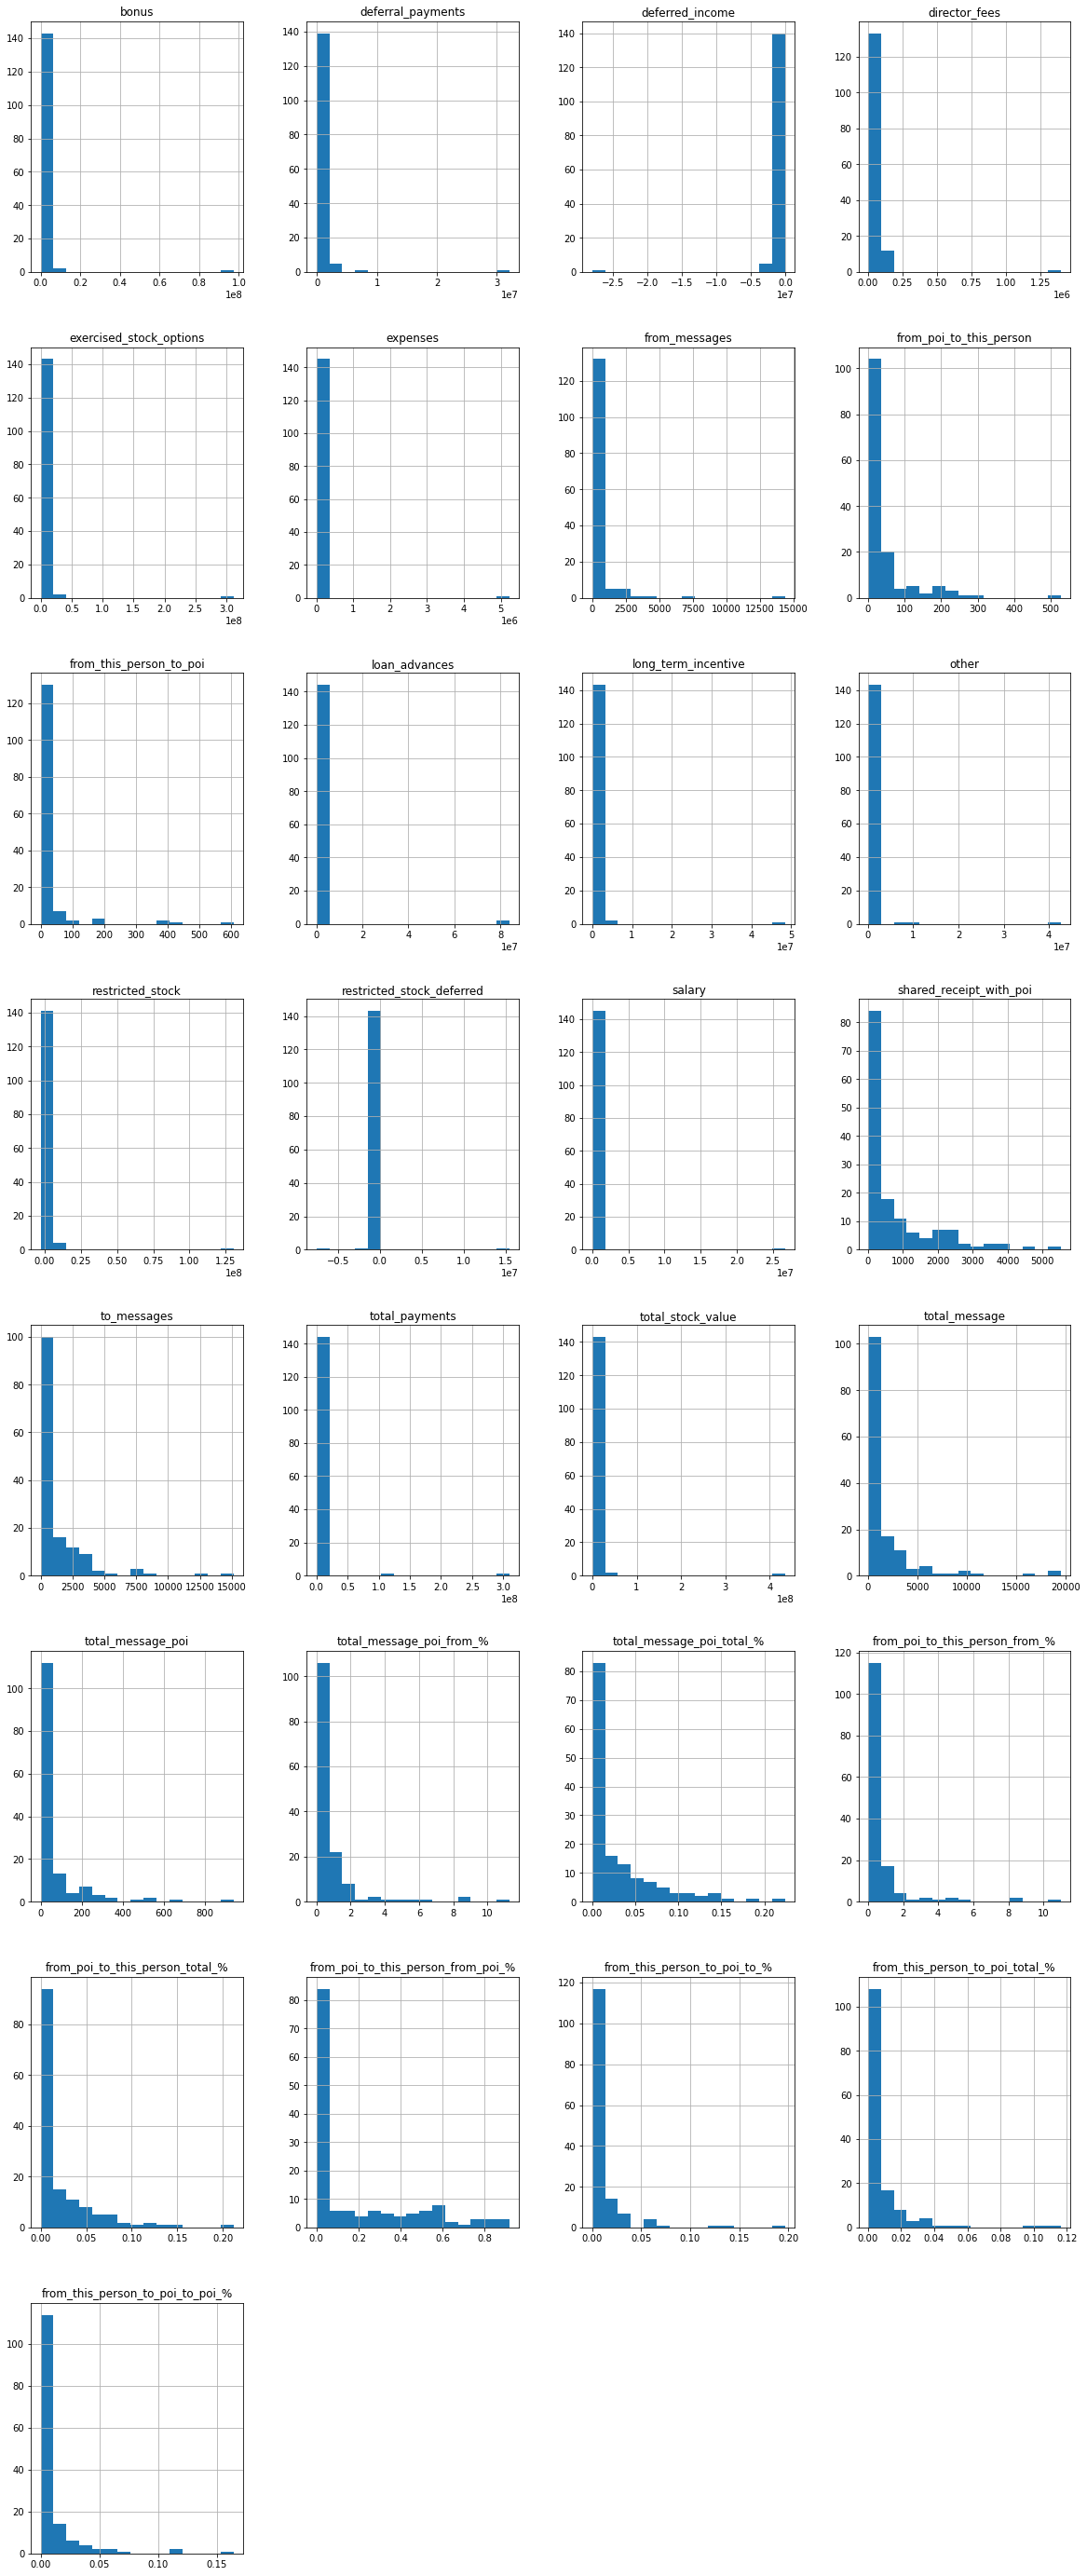

In [17]:
df.hist(bins = 15, figsize=(20,50), layout=(8,4))
plt.show()

In [18]:
#資料標準化
col_name = df.columns
df = StandardScaler().fit_transform(df)
# 將前述轉換完畢資料 df , 重新切成 train_X, test_X
train_num = train_Y.shape[0]
train_X = df[:train_num]
test_X = df[train_num:]

In [19]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(train_X, train_Y,test_size=0.25, random_state=42)

In [20]:
#特徵重要性

# 隨機森林擬合後, 將結果依照重要性由高到低排序
estimator = RandomForestRegressor()
estimator.fit(train_X, train_Y)
# estimator.feature_importances_ 就是模型的特徵重要性, 這邊先與欄位名稱結合起來, 才能看到重要性與欄位名稱的對照表
feats = pd.Series(data=estimator.feature_importances_, index=col_name) # df_train.columns
feats = feats.sort_values(ascending=False)
feats

exercised_stock_options               0.207076
expenses                              0.118193
other                                 0.090786
bonus                                 0.085243
total_stock_value                     0.067367
salary                                0.051285
from_this_person_to_poi_total_%       0.046732
total_message_poi_from_%              0.039275
from_poi_to_this_person_from_poi_%    0.031772
deferred_income                       0.028989
from_poi_to_this_person_total_%       0.024110
total_payments                        0.021852
long_term_incentive                   0.020324
total_message_poi_total_%             0.019227
total_message                         0.016658
from_poi_to_this_person_from_%        0.016538
restricted_stock                      0.016410
from_this_person_to_poi               0.015980
from_this_person_to_poi_to_poi_%      0.014207
to_messages                           0.012144
shared_receipt_with_poi               0.011768
from_poi_to_t

In [21]:
#模型評估

# NAIVE BAYES
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(x_train,y_train.values.ravel())
nb_predicted= nb_model.predict(x_test)
nb_prob= nb_model.predict_proba(train_X)[:,1]
print('Naive Bayes',accuracy_score(y_test, nb_predicted))
print('Naive Bayes',cross_val_score(nb_model, train_X, train_Y.values.ravel()).mean())

#KNN
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(x_train,y_train.values.ravel())
knn_predicted= knn_model.predict(x_test)
knn_prob= knn_model.predict_proba(train_X)[:,1]
print('KNN',accuracy_score(y_test, knn_predicted))
print('KNN',cross_val_score(knn_model, train_X, train_Y.values.ravel()).mean())

#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(n_estimators = 100,random_state = 22)
rfc_model.fit(x_train,y_train.values.ravel())
rfc_predicted = rfc_model.predict(x_test)
rfc_prob= rfc_model.predict_proba(train_X)[:,1]
print('Random Forest',accuracy_score(y_test,rfc_predicted))
print('Random Forest',cross_val_score(rfc_model, train_X, train_Y.values.ravel()).mean())

#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=0, solver='sag')
lr_model.fit(x_train,y_train.values.ravel())
lr_predicted = lr_model.predict(x_test)
lr_prob= lr_model.predict_proba(train_X)[:,1]
print('Logistic Regression',accuracy_score(y_test, lr_predicted))
print('Logistic Regression',cross_val_score(rfc_model, train_X, train_Y.values.ravel()).mean())

#SVM
from sklearn.svm import SVC

svc_model = SVC(gamma = 'auto', probability=True)
svc_model.fit(x_train,y_train.values.ravel())
svc_predicted = svc_model.predict(x_test)
svc_prob= svc_model.predict_proba(train_X)[:,1]
print('SVM',accuracy_score(y_test, svc_predicted))
print('SVM',cross_val_score(svc_model, train_X, train_Y.values.ravel()).mean())

#DECISION TREE
from sklearn.tree import DecisionTreeClassifier

dtree_model = DecisionTreeClassifier()
dtree_model.fit(x_train,y_train.values.ravel())
dtree_predicted = dtree_model.predict(x_test)
dtree_prob= dtree_model.predict_proba(train_X)[:,1]
print('Decision Tree',accuracy_score(y_test, dtree_predicted))
print('Decision Tree',cross_val_score(dtree_model, train_X, train_Y.values.ravel()).mean())

#XGBOOST
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train,y_train.values.ravel())
xgb_predicted = xgb.predict(x_test)
xgb_prob= xgb.predict_proba(train_X)[:,1]
print('XGBoost',accuracy_score(y_test, xgb_predicted))
print('XGBoost',cross_val_score(xgb, train_X, train_Y.values.ravel()).mean())

Naive Bayes 0.6896551724137931
Naive Bayes 0.6308300395256917
KNN 0.8275862068965517
KNN 0.8853754940711462
Random Forest 0.8275862068965517
Random Forest 0.9023715415019762
Logistic Regression 0.8275862068965517
Logistic Regression 0.9023715415019762
SVM 0.8275862068965517
SVM 0.8853754940711462
Decision Tree 0.8275862068965517
Decision Tree 0.7798418972332015
[17:56:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost 0.8620689655172413
[17:56:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old

In [22]:
meta_estimator = GradientBoostingClassifier(tol=100, subsample=0.75, n_estimators=100, 
                                           max_features='sqrt', max_depth=4, learning_rate=0.3)
stacking = StackingClassifier(classifiers=[knn_model, rfc_model, lr_model, svc_model, dtree_model, xgb], meta_classifier=meta_estimator, use_probas=True, average_probas=False)

[17:56:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:>

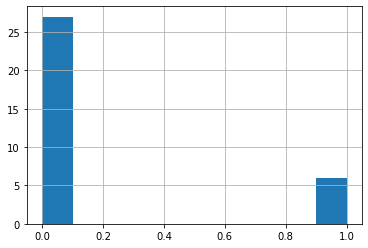

In [23]:
stacking.fit(train_X, train_Y)
stacking_pred = stacking.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': name, 'poi': stacking_pred})
sub.to_csv(data_path + 'stacking.csv', index=False)
sub.poi.hist()

[17:56:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:>

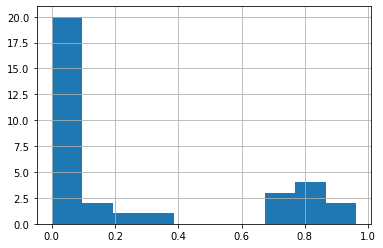

In [24]:
xgb.fit(train_X, train_Y, verbose=True)
xgb_pred = xgb.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': name, 'poi': xgb_pred})
#sub.to_csv(data_path + 'xgb.csv', index=False)
sub.poi.hist()

<AxesSubplot:>

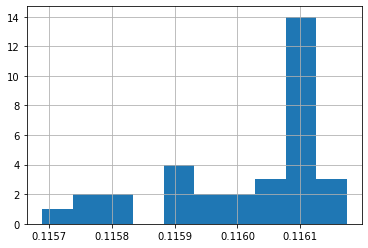

In [25]:
svc_model.fit(train_X, train_Y)
svc_pred = svc_model.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': name, 'poi': svc_pred})
#sub.to_csv(data_path + 'svc_model.csv', index=False)
sub.poi.hist()

<AxesSubplot:>

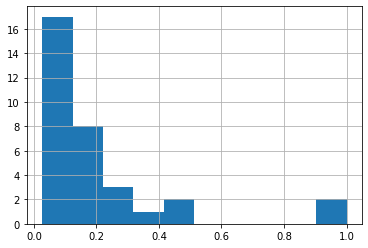

In [26]:
lr_model.fit(train_X, train_Y)
lr_pred = lr_model.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': name, 'poi': lr_pred})
#sub.to_csv(data_path + 'lr_model.csv', index=False)
sub.poi.hist()

<AxesSubplot:>

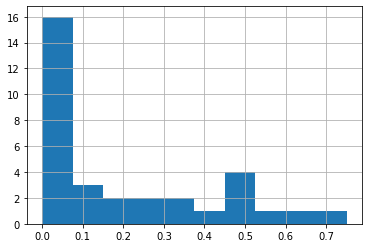

In [27]:
rfc_model.fit(train_X, train_Y)
rfc_pred = rfc_model.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': name, 'poi': rfc_pred})
sub.to_csv(data_path + 'rfc_model.csv', index=False)
sub.poi.hist()

<AxesSubplot:>

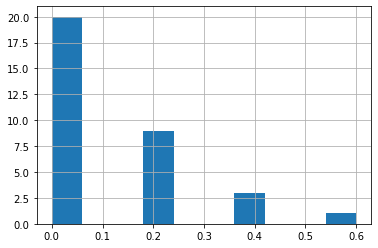

In [28]:
knn_model.fit(train_X, train_Y)
knn_pred = knn_model.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': name, 'poi': knn_pred})
#sub.to_csv(data_path + 'knn_model.csv', index=False)
sub.poi.hist()

In [29]:
def roc_plot(y, y_prob, name=""):
    fpr, tpr, _ = roc_curve(y, y_prob)
    roc_auc = auc(fpr, tpr)

    fig = plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} ROC Curve')
    plt.legend(loc="best")
    plt.show()

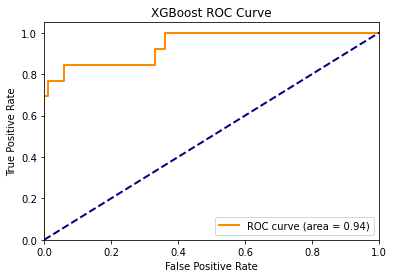

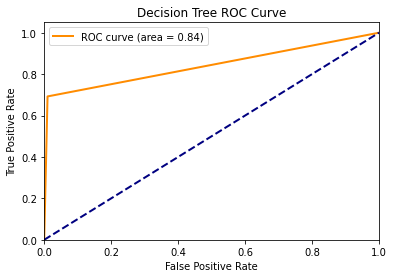

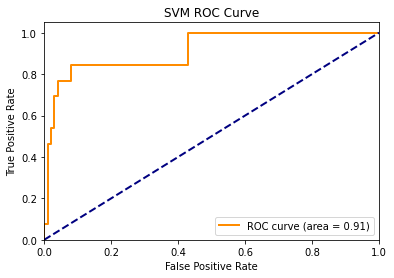

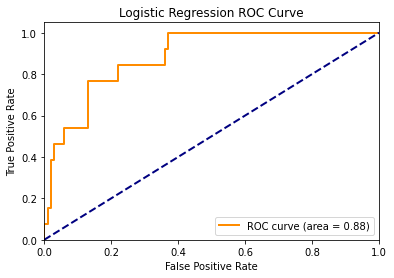

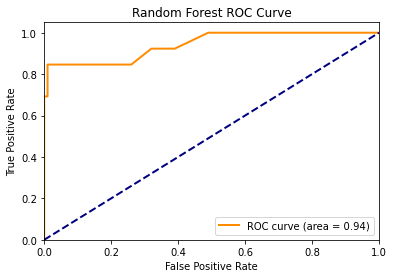

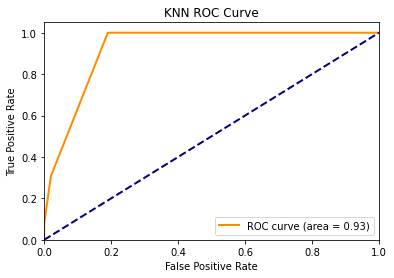

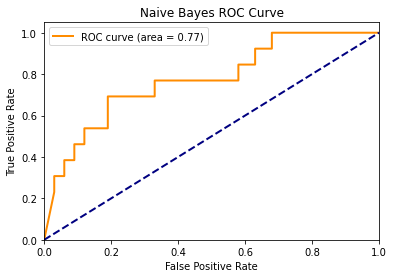

In [30]:
pred_list = [xgb_prob, dtree_prob, svc_prob, lr_prob, rfc_prob, knn_prob, nb_prob]
name_list = ['XGBoost', 'Decision Tree', 'SVM', 'Logistic Regression', 'Random Forest', 'KNN', 'Naive Bayes']
for y_pred, name in zip(pred_list, name_list):
    roc_plot(train_Y, y_pred, name)